In [31]:
import pandas as pd
movies = pd.read_csv('D:\Movie Recommendation\cleaned_movies.csv')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\kalya\AppData\Local\Temp\ipykernel_21772\2390646592.py:2: SyntaxWarning: invalid escape sequence '\M'
  movies = pd.read_csv('D:\Movie Recommendation\cleaned_movies.csv')


In [32]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),adventure|animation|children|comedy|fantasy,1995.0
1,2,Jumanji (1995),adventure|children|fantasy,1995.0
2,3,Grumpier Old Men (1995),comedy|romance,1995.0
3,4,Waiting to Exhale (1995),comedy|drama|romance,1995.0
4,5,Father of the Bride Part II (1995),comedy,1995.0


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62013 entries, 0 to 62012
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62013 non-null  int64  
 1   title    62013 non-null  object 
 2   genres   62013 non-null  object 
 3   year     62013 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [34]:
movies.isnull().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [35]:
movies.describe()

,movieId,year
count,62013.000000,62013.000000
mean,121895.531953,1992.044700
std,63320.572248,25.364884
min,1.000000,1874.000000
25%,81698.000000,1976.000000
50%,137614.000000,2002.000000
75%,173009.000000,2012.000000
max,209171.000000,2019.000000


In [36]:
movies = movies[['movieId', 'title', 'genres']]

In [37]:
movies['tags'] = movies['genres'].fillna('')

In [38]:
new_data = movies.drop(columns=['genres'])

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kalya\AppData\Local\Temp\ipykernel_21772\3588520886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


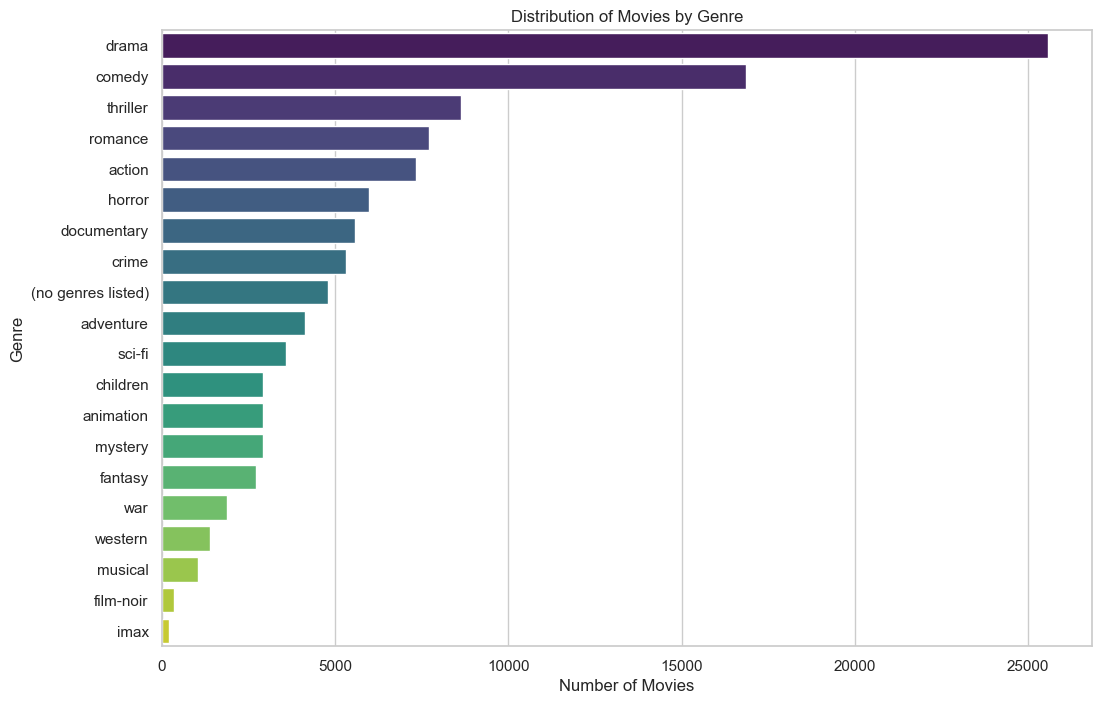

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
genre_counts = movies['genres'].str.split('|').explode().value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

In [42]:
cv = CountVectorizer(max_features=10000, stop_words='english')

In [43]:
vector = cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [44]:
nn = NearestNeighbors(metric='cosine', algorithm='brute')

In [45]:
nn.fit(vector)

NearestNeighbors(algorithm='brute', metric='cosine')

In [46]:
import pickle

In [47]:
with open('movies_list.pkl', 'wb') as f:
    pickle.dump(new_data, f)
with open('nearest_neighbors.pkl', 'wb') as f:
    pickle.dump(nn, f)
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('vector.pkl', 'wb') as f:
    pickle.dump(vector, f)

In [48]:
def recommend(movie_title):
    index = new_data[new_data['title'] == movie_title].index[0]
    distances, indices = nn.kneighbors([vector[index]], n_neighbors=6)
    recommendations = [new_data.iloc[i].title for i in indices[0] if i != index]  # Skip the first movie (itself)
    return recommendations

In [51]:
recommendations = recommend("No manches Frida (2016)")
recommendations

['The Albatross (2016)',
 'São Jorge (2016)',
 'Basette (2008)',
 'Violent City (1975)',
 'Between God, The Devil and a Winchester (1968)',
 'SMART: The Documentary (2016)']